In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score


In [4]:
data = pd.read_csv(r"C:\Users\harid\OneDrive\Desktop\data sets\laptop_data_cleaned.csv")

In [5]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [8]:
data.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [9]:
numeric_col = data.columns[data.dtypes!='object']
catgoric_col = data.columns[data.dtypes =='object']


In [10]:
print(f'num_col:{numeric_col}')
print(f'cat_col:{catgoric_col}')

num_col:Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'], dtype='object')
cat_col:Index(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype='object')


In [11]:
#Fill missing values for num columns with the mean
data[numeric_col] = data[numeric_col].apply(lambda col : col.fillna(col.median()))

#Fill missing values for cat columns with the mode
data[catgoric_col] = data[catgoric_col].apply(lambda col: col.fillna(col.mode))


In [12]:
data[numeric_col]

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256
...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,500,0
1269,4,1.80,10.433899,1,1,157.350512,0,128
1270,16,1.30,11.288115,1,1,276.053530,0,512
1271,2,1.50,9.409283,0,0,111.935204,0,0


In [13]:
data[catgoric_col]

,Company,TypeName,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac
...,...,...,...,...,...
1268,Asus,Notebook,Intel Core i7,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1270,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1271,Lenovo,Notebook,Other Intel Processor,Intel,Windows


In [14]:
data[numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ram          1273 non-null   int64  
 1   Weight       1273 non-null   float64
 2   Price        1273 non-null   float64
 3   TouchScreen  1273 non-null   int64  
 4   Ips          1273 non-null   int64  
 5   Ppi          1273 non-null   float64
 6   HDD          1273 non-null   int64  
 7   SSD          1273 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 79.7 KB


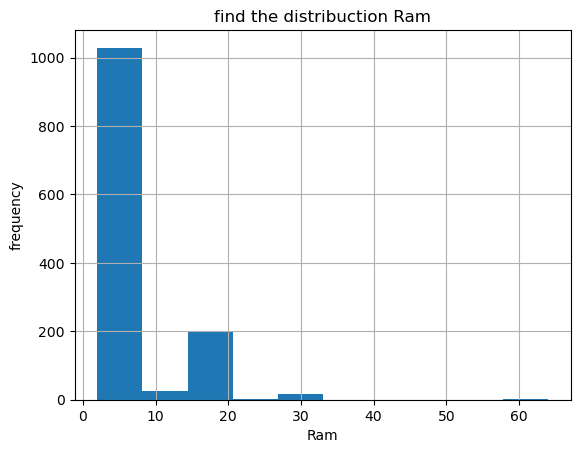

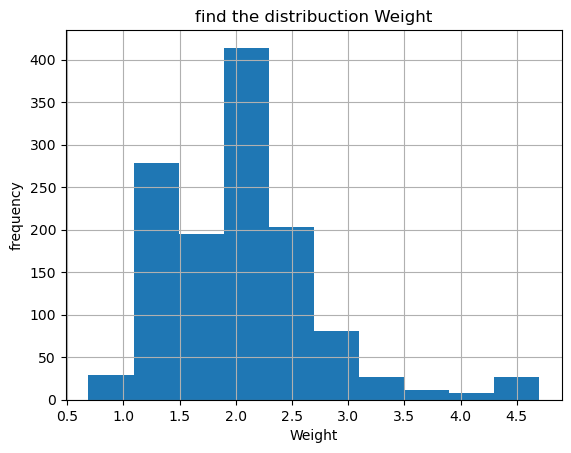

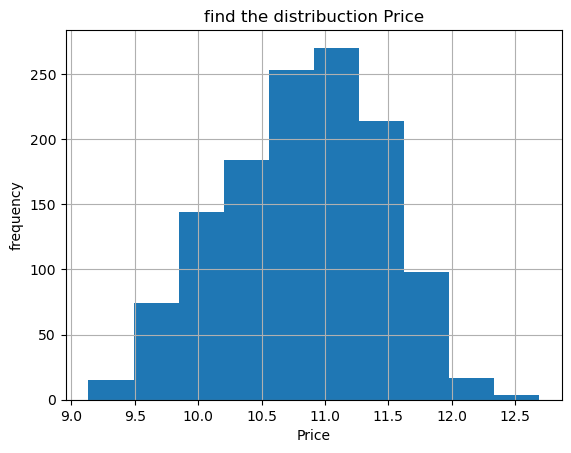

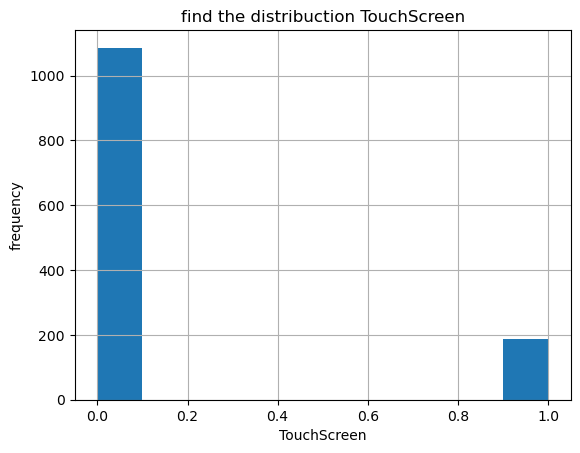

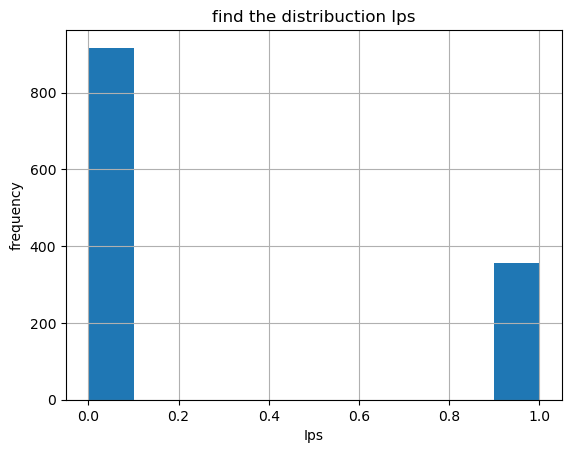

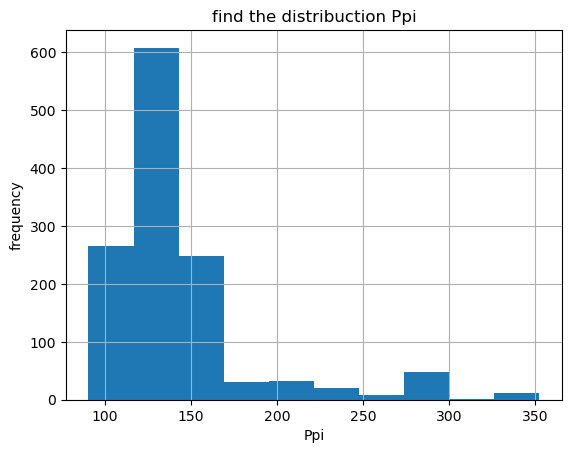

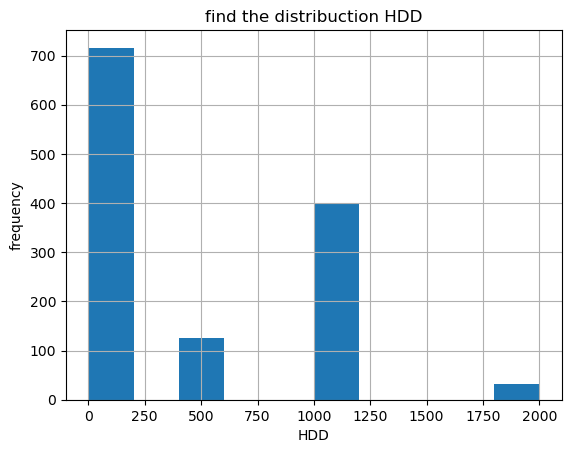

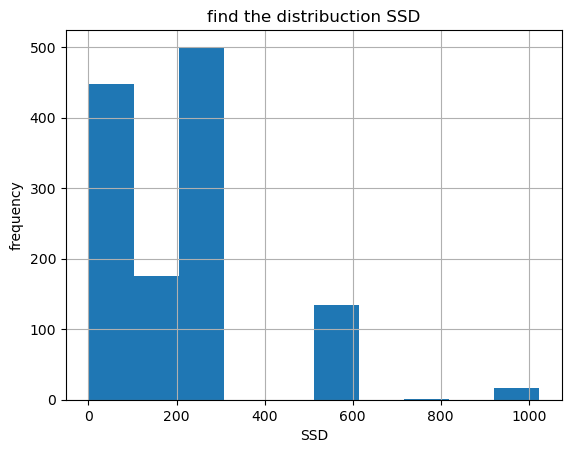

In [15]:
# #histogram  in num columns
for x in numeric_col:
    data[x].hist()
    plt.title(f"find the distribuction {x}")
    plt.xlabel(x)
    plt.ylabel('frequency')
    plt.show()
    

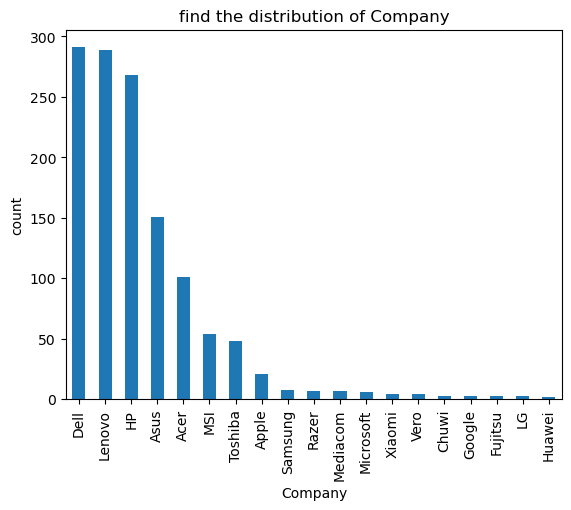

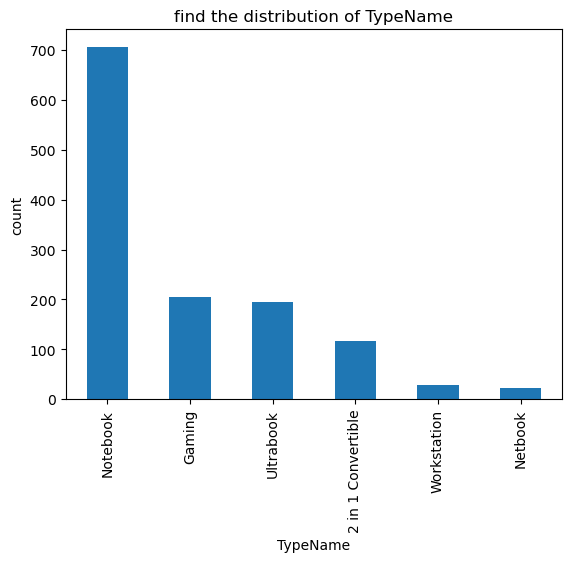

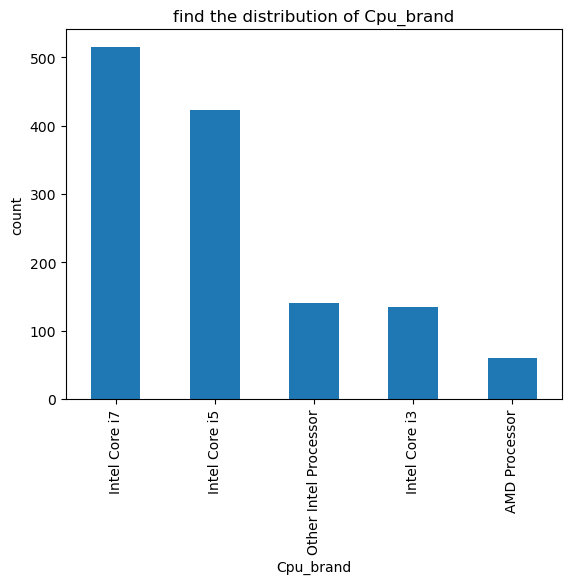

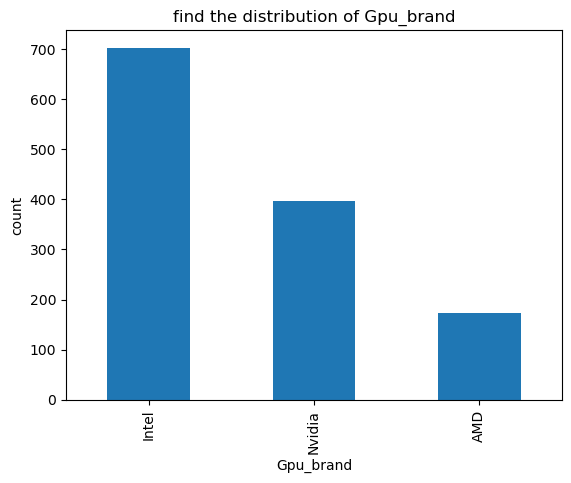

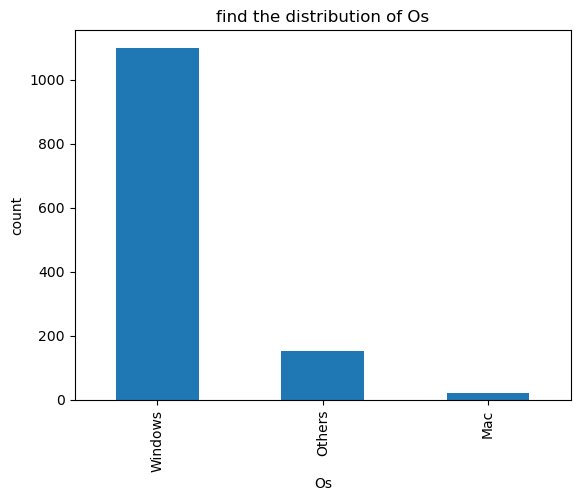

In [16]:
#bar plots for cat columns 
for x in catgoric_col:
    plt.figure()
    data[x].value_counts().plot(kind ='bar')
    plt.title(f'find the distribution of {x}')
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()
    

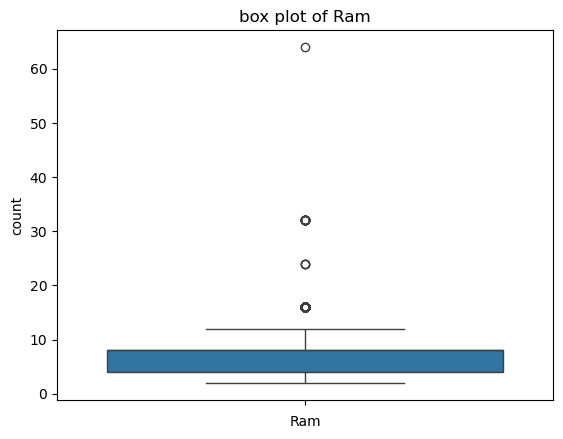

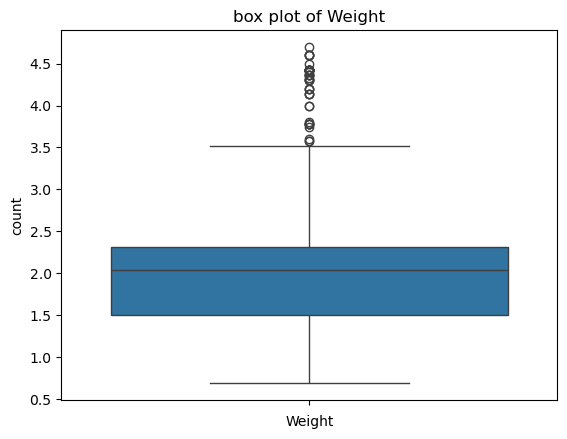

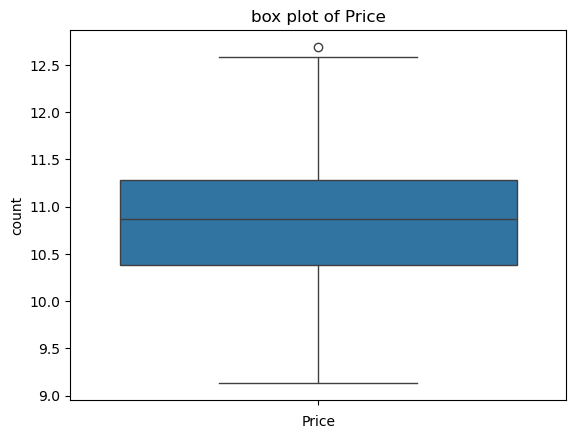

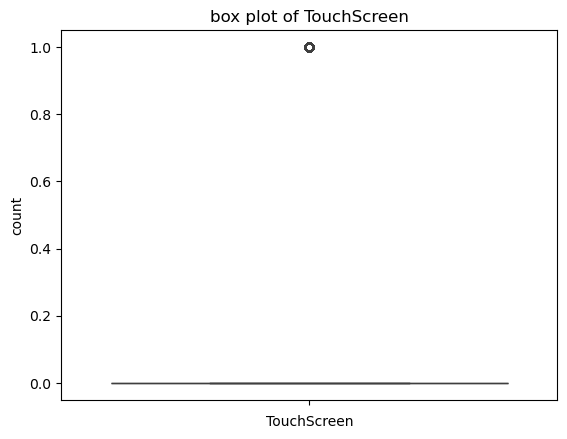

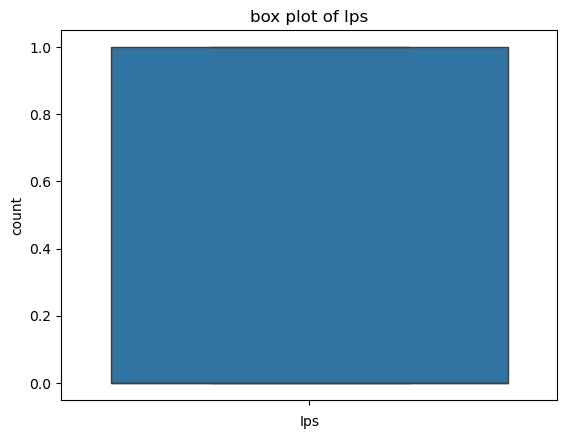

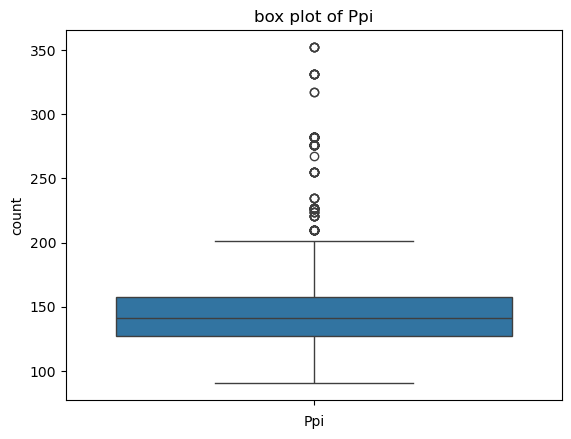

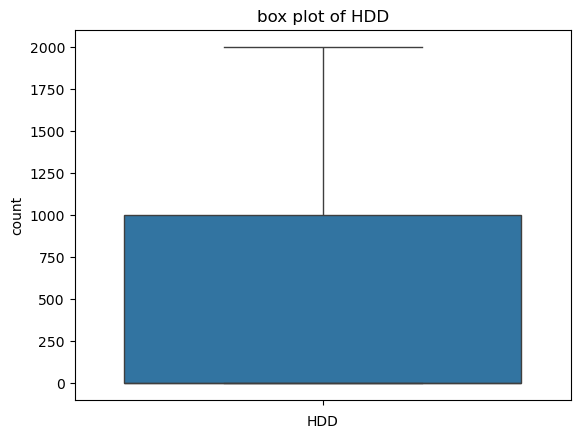

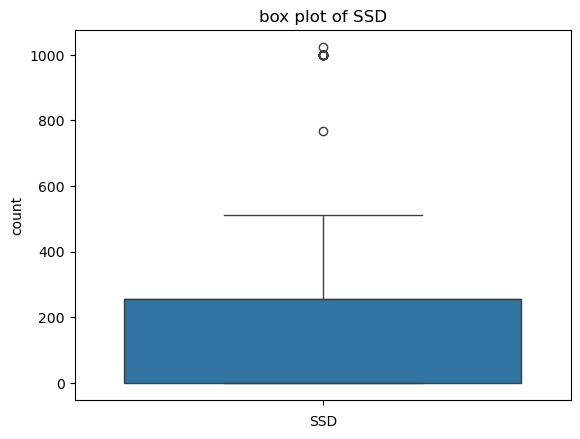

In [17]:
for x in numeric_col:
     plt.figure()
     sns.boxplot(data=data[x])
     plt.title(f'box plot of {x}')
     plt.xlabel(x)
     plt.ylabel('count')
     plt.show()

In [18]:
#remove outlayer using  IQR method
q1 = data[numeric_col].quantile(0.10)
q2 = data[numeric_col].quantile(0.80)
q3 = q2 - q1

data = data [~((data[numeric_col] < (q1 -1.5 * q3)) | (data[numeric_col] > (q2 +1.5 * q3))).any(axis=1)]
q3

Ram               4.000000
Weight            1.140000
Price             1.431044
TouchScreen       0.000000
Ips               1.000000
Ppi              65.177448
HDD            1000.000000
SSD             256.000000
dtype: float64

In [19]:
#calculate correlation matrix
correlation_matrix =data[numeric_col].corr()
correlation_matrix


,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.109516,0.672893,NaN,0.253055,0.388909,0.021022,0.445630
Weight,0.109516,1.000000,-0.045634,NaN,-0.079707,-0.454028,0.515420,-0.258339
Price,0.672893,-0.045634,1.000000,NaN,0.299728,0.528939,-0.162587,0.570795
TouchScreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ips,0.253055,-0.079707,0.299728,NaN,1.000000,0.401137,-0.095777,0.234817
Ppi,0.388909,-0.454028,0.528939,NaN,0.401137,1.000000,-0.352045,0.511345
HDD,0.021022,0.515420,-0.162587,NaN,-0.095777,-0.352045,1.000000,-0.583374
SSD,0.445630,-0.258339,0.570795,NaN,0.234817,0.511345,-0.583374,1.000000


In [20]:
new_df = data[numeric_col].drop(columns=['TouchScreen'])
new_df

,Ram,Weight,Price,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,1,226.983005,0,128
1,8,1.34,10.776777,0,127.677940,0,0
2,8,1.86,10.329931,0,141.211998,0,256
4,8,1.37,11.473101,1,226.983005,0,256
5,4,2.10,9.967026,0,100.454670,500,0
...,...,...,...,...,...,...,...
1266,8,2.30,10.667632,0,100.454670,1000,0
1267,2,1.17,9.317895,0,135.094211,0,0
1268,4,2.20,10.555257,0,100.454670,500,0
1271,2,1.50,9.409283,0,111.935204,0,0


In [21]:
#calculate correlation matrix
correlation_matrix =new_df.corr()
correlation_matrix


,Ram,Weight,Price,Ips,Ppi,HDD,SSD
Ram,1.000000,0.109516,0.672893,0.253055,0.388909,0.021022,0.445630
Weight,0.109516,1.000000,-0.045634,-0.079707,-0.454028,0.515420,-0.258339
Price,0.672893,-0.045634,1.000000,0.299728,0.528939,-0.162587,0.570795
Ips,0.253055,-0.079707,0.299728,1.000000,0.401137,-0.095777,0.234817
Ppi,0.388909,-0.454028,0.528939,0.401137,1.000000,-0.352045,0.511345
HDD,0.021022,0.515420,-0.162587,-0.095777,-0.352045,1.000000,-0.583374
SSD,0.445630,-0.258339,0.570795,0.234817,0.511345,-0.583374,1.000000


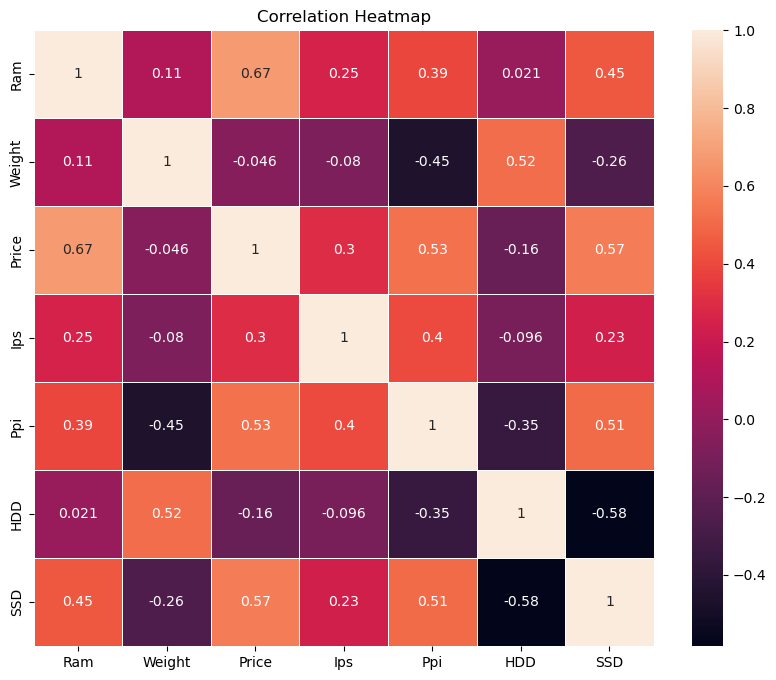

In [22]:

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot = True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [23]:
#standarize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler = LabelEncoder()
scaler

LabelEncoder()

In [24]:
new_df= scaler.fit_transform(numeric_col)

print(data[numeric_col])

      Ram  Weight      Price  TouchScreen  Ips         Ppi   HDD  SSD
0       8    1.37  11.175755            0    1  226.983005     0  128
1       8    1.34  10.776777            0    0  127.677940     0    0
2       8    1.86  10.329931            0    0  141.211998     0  256
4       8    1.37  11.473101            0    1  226.983005     0  256
5       4    2.10   9.967026            0    0  100.454670   500    0
...   ...     ...        ...          ...  ...         ...   ...  ...
1266    8    2.30  10.667632            0    0  100.454670  1000    0
1267    2    1.17   9.317895            0    0  135.094211     0    0
1268    4    2.20  10.555257            0    0  100.454670   500    0
1271    2    1.50   9.409283            0    0  111.935204     0    0
1272    6    2.19  10.614129            0    0  100.454670  1000    0

[903 rows x 8 columns]


In [25]:
data[catgoric_col]= scaler.fit_transform(catgoric_col)
print(data[catgoric_col])

      Company  TypeName  Cpu_brand  Gpu_brand  Os
0           0         4          1          2   3
1           0         4          1          2   3
2           0         4          1          2   3
4           0         4          1          2   3
5           0         4          1          2   3
...       ...       ...        ...        ...  ..
1266        0         4          1          2   3
1267        0         4          1          2   3
1268        0         4          1          2   3
1271        0         4          1          2   3
1272        0         4          1          2   3

[903 rows x 5 columns]


In [26]:
final = pd.concat([data[numeric_col], data[catgoric_col]], axis=1, join='outer')
print(final)
final.info()


      Ram  Weight      Price  TouchScreen  Ips         Ppi   HDD  SSD  \
0       8    1.37  11.175755            0    1  226.983005     0  128   
1       8    1.34  10.776777            0    0  127.677940     0    0   
2       8    1.86  10.329931            0    0  141.211998     0  256   
4       8    1.37  11.473101            0    1  226.983005     0  256   
5       4    2.10   9.967026            0    0  100.454670   500    0   
...   ...     ...        ...          ...  ...         ...   ...  ...   
1266    8    2.30  10.667632            0    0  100.454670  1000    0   
1267    2    1.17   9.317895            0    0  135.094211     0    0   
1268    4    2.20  10.555257            0    0  100.454670   500    0   
1271    2    1.50   9.409283            0    0  111.935204     0    0   
1272    6    2.19  10.614129            0    0  100.454670  1000    0   

      Company  TypeName  Cpu_brand  Gpu_brand  Os  
0           0         4          1          2   3  
1           0      

In [27]:
data[numeric_col]

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
4,8,1.37,11.473101,0,1,226.983005,0,256
5,4,2.10,9.967026,0,0,100.454670,500,0
...,...,...,...,...,...,...,...,...
1266,8,2.30,10.667632,0,0,100.454670,1000,0
1267,2,1.17,9.317895,0,0,135.094211,0,0
1268,4,2.20,10.555257,0,0,100.454670,500,0
1271,2,1.50,9.409283,0,0,111.935204,0,0


In [28]:
data[catgoric_col]

,Company,TypeName,Cpu_brand,Gpu_brand,Os
0,0,4,1,2,3
1,0,4,1,2,3
2,0,4,1,2,3
4,0,4,1,2,3
5,0,4,1,2,3
...,...,...,...,...,...
1266,0,4,1,2,3
1267,0,4,1,2,3
1268,0,4,1,2,3
1271,0,4,1,2,3


In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ram          903 non-null    int64  
 1   Weight       903 non-null    float64
 2   Price        903 non-null    float64
 3   TouchScreen  903 non-null    int64  
 4   Ips          903 non-null    int64  
 5   Ppi          903 non-null    float64
 6   HDD          903 non-null    int64  
 7   SSD          903 non-null    int64  
 8   Company      903 non-null    int32  
 9   TypeName     903 non-null    int32  
 10  Cpu_brand    903 non-null    int32  
 11  Gpu_brand    903 non-null    int32  
 12  Os           903 non-null    int32  
dtypes: float64(3), int32(5), int64(5)
memory usage: 81.1 KB


In [30]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import LabelEncoder
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [31]:
#independent and dependent features
x = final.drop(columns=['Price'])
y = final["Price"]
x.columns

Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD', 'Company',
       'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'],
      dtype='object')

In [32]:
y

0       11.175755
1       10.776777
2       10.329931
4       11.473101
5        9.967026
          ...    
1266    10.667632
1267     9.317895
1268    10.555257
1271     9.409283
1272    10.614129
Name: Price, Length: 903, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 40)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(722, 12)
(181, 12)
(722,)
(181, 12)


In [35]:
#MODEL TRAINING
#

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
models = {'linear regression':LinearRegression(),
                'Lasso':Lasso(),
                'ridge':Ridge(),
                'elasticnet':ElasticNet(),
                'RandomForestRegressor':RandomForestRegressor(),
            
                }

In [37]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [38]:
list(models)

['linear regression', 'Lasso', 'ridge', 'elasticnet', 'RandomForestRegressor']

In [39]:
for i in range (len(list(models))):
    model = list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()


In [40]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2


In [41]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(x_train,y_train)

    #make_prediction
    y_pred=model.predict(x_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 0.10488596189951169
MAE: 0.25630230988503644
R2 SCORE: 0.6282875406501462


model training performance Lasso()
MSE: 0.1527959502346395
MAE: 0.30350704577502596
R2 SCORE: 0.4584960903077714


model training performance Ridge()
MSE: 0.10490405278346708
MAE: 0.25628711783219904
R2 SCORE: 0.6282234271420553


model training performance ElasticNet()
MSE: 0.15150521776473738
MAE: 0.2996147802257127
R2 SCORE: 0.46307040446822767


model training performance RandomForestRegressor()
MSE: 0.07074061201005191
MAE: 0.20386839681574428
R2 SCORE: 0.7492975571758319




In [42]:
max(r2_list)


0.7492975571758319

In [43]:
pd.DataFrame(list(zip(models, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
4,RandomForestRegressor,0.749298
0,linear regression,0.628288
2,ridge,0.628223
3,elasticnet,0.463070
1,Lasso,0.458496


In [44]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1139,11.658836,11.122615,0.536221
1252,10.952842,10.884896,0.067946
133,10.324700,10.214023,0.110677
645,9.588689,9.596987,-0.008298
1160,11.288115,10.855486,0.432628
...,...,...,...
192,10.883216,10.998698,-0.115482
485,10.931154,11.001840,-0.070686
833,11.053903,10.855486,0.198416
870,10.936857,9.987055,0.949802


In [46]:
data.to_csv("INDIAN_LAPTOP",index= False)

In [48]:
df = pd.read_csv(r"C:\Users\harid\OneDrive\Desktop\INDIAN_LAPTOP")
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,0,4,8,1.37,11.175755,0,1,226.983005,1,0,128,2,3
1,0,4,8,1.34,10.776777,0,0,127.677940,1,0,0,2,3
2,0,4,8,1.86,10.329931,0,0,141.211998,1,0,256,2,3
3,0,4,8,1.37,11.473101,0,1,226.983005,1,0,256,2,3
4,0,4,4,2.10,9.967026,0,0,100.454670,1,500,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0,4,8,2.30,10.667632,0,0,100.454670,1,1000,0,2,3
899,0,4,2,1.17,9.317895,0,0,135.094211,1,0,0,2,3
900,0,4,4,2.20,10.555257,0,0,100.454670,1,500,0,2,3
901,0,4,2,1.50,9.409283,0,0,111.935204,1,0,0,2,3
